# Plots

## Detailed

[1] "Rank of compression performance"


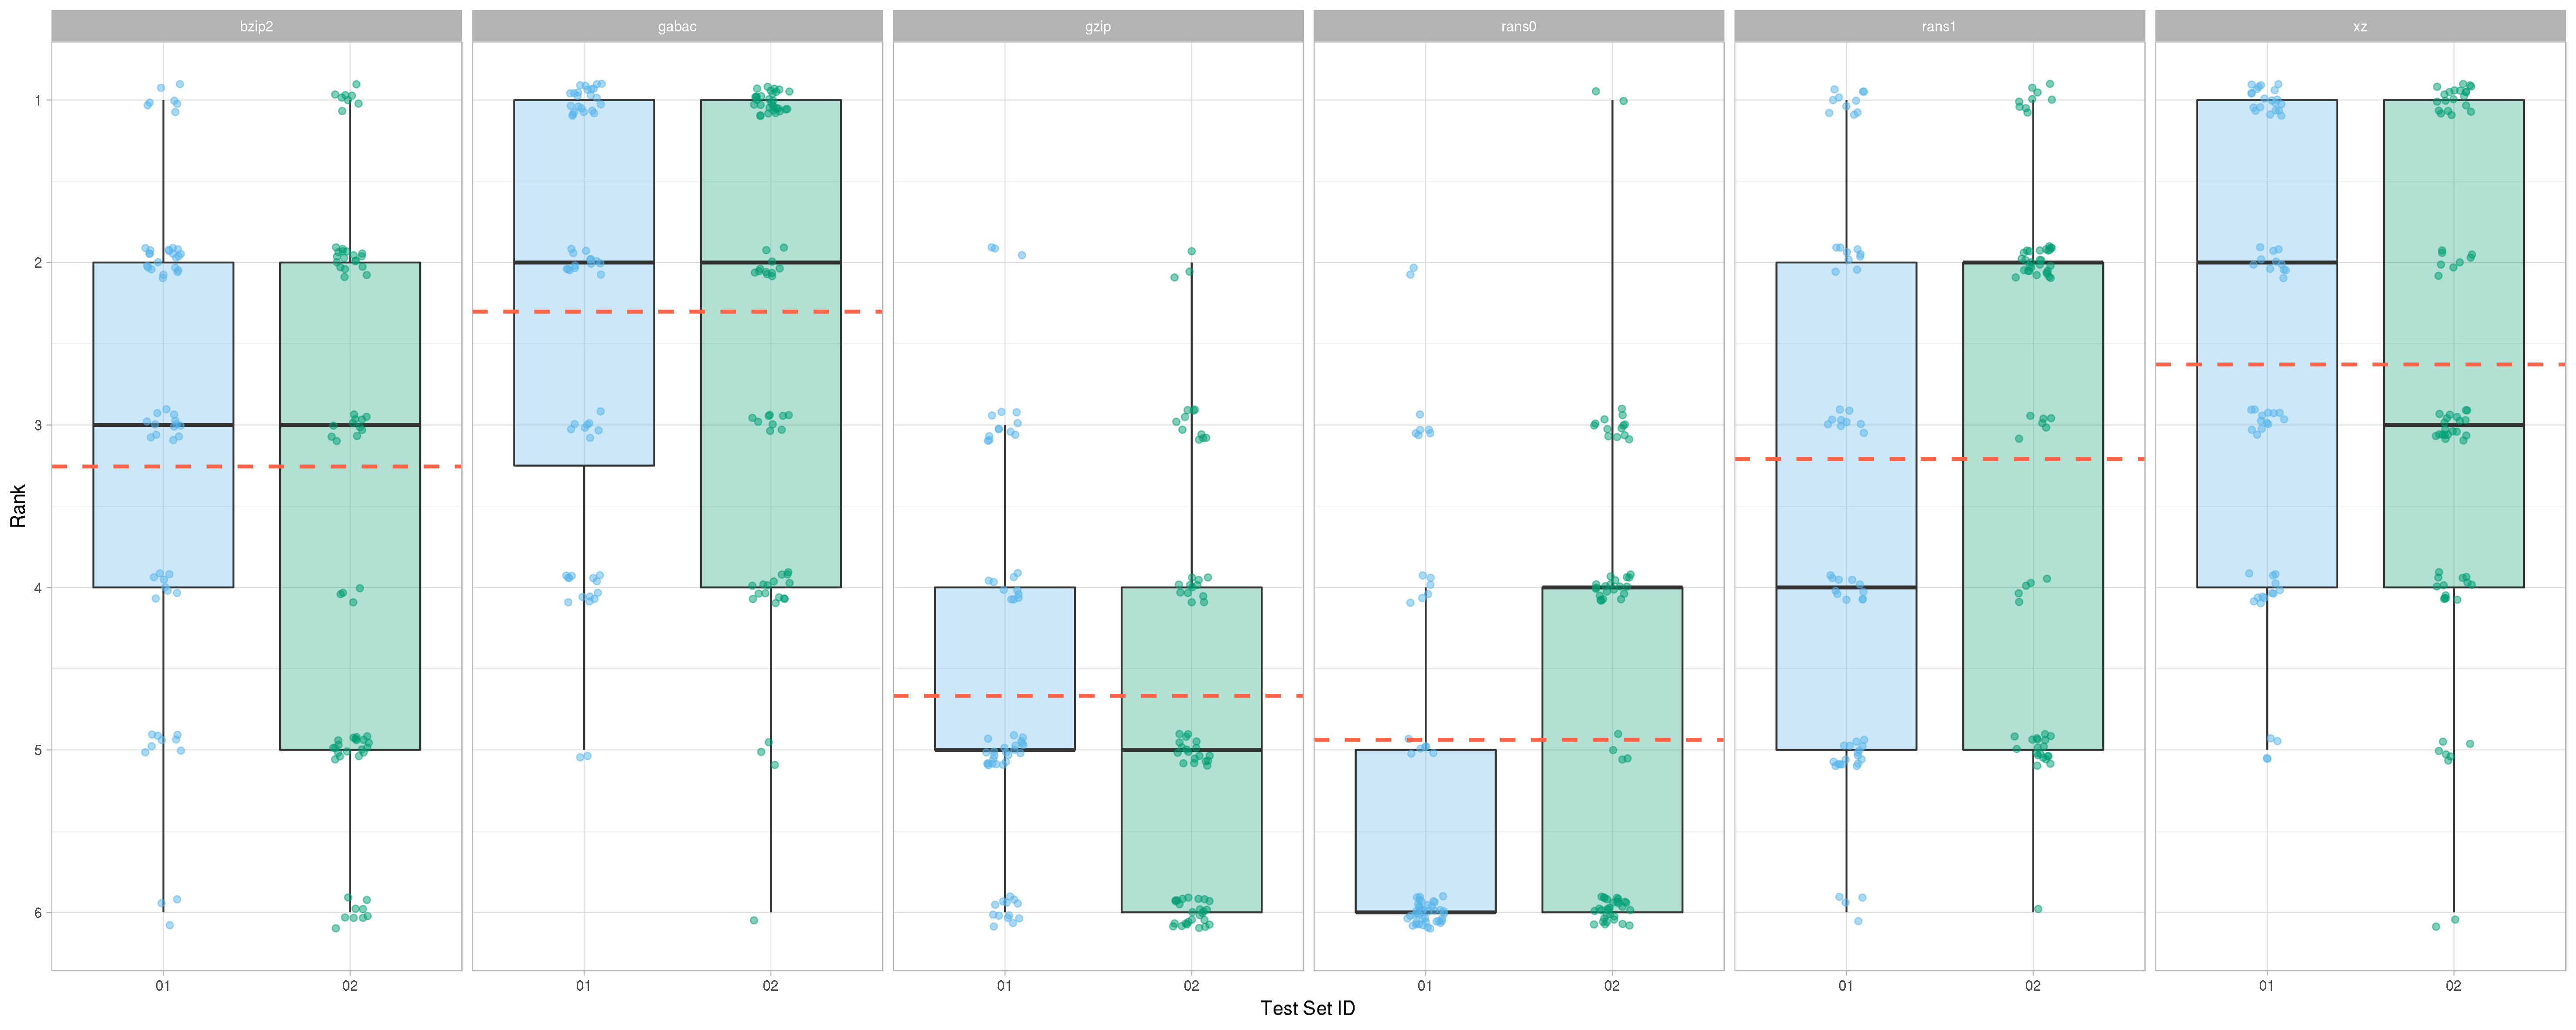

[1] "Rank of speed performance"


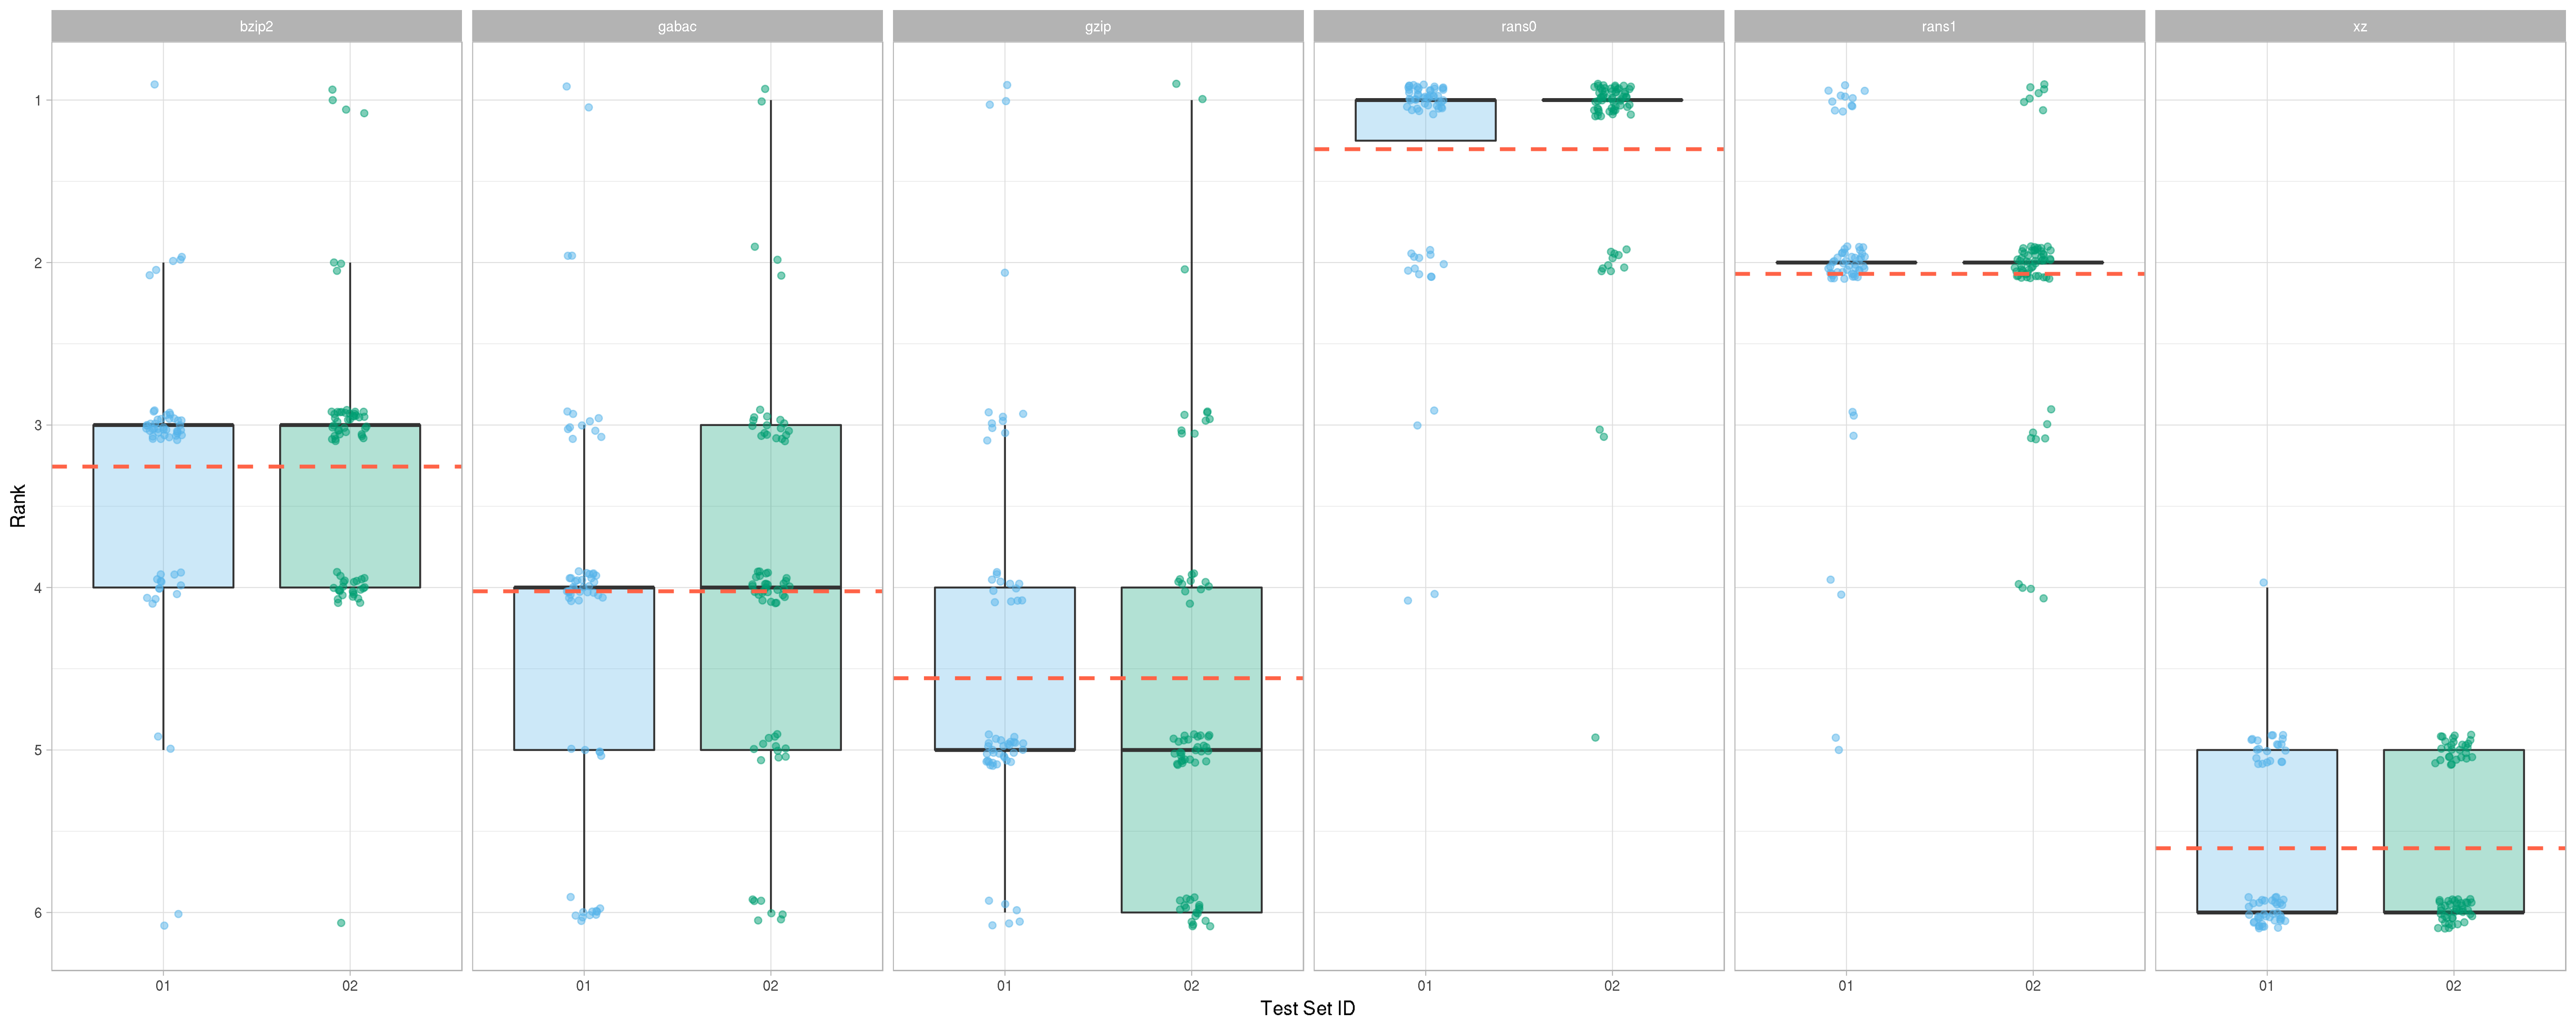

In [19]:
# Install libraries
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("IRdisplay")

# Load libraries
library("dplyr", warn.conflicts = FALSE)
library("ggplot2")
library("IRdisplay")

# Load the data
#dataframe = read.csv("results/MPEG-G.csv")
#dataframe = read.csv("results/CRAM.csv")
#dataframe = read.csv("results/DeeZ.csv")
dataframe = read.csv("results/CRAM_and_DeeZ.csv")

# Compute a dataframe containing the medians
tmp <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(median_compression_time = median(compression_time_s))
tmp2 <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(median_compression_rank = median(compression_rank))
tmp3 <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(median_compression_speed_rank = median(compression_speed_rank))
medians <- tmp %>% dplyr::inner_join(tmp, by = "codec")
medians <- medians %>% dplyr::inner_join(tmp2, by = "codec")
medians <- medians %>% dplyr::inner_join(tmp3, by = "codec")

# Compute a dataframe containing the medians
tmp <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(mean_compression_time = mean(compression_time_s))
tmp2 <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(mean_compression_rank = mean(compression_rank))
tmp3 <- dataframe %>% dplyr::group_by(codec) %>% dplyr::summarize(mean_compression_speed_rank = mean(compression_speed_rank))
means <- tmp %>% dplyr::inner_join(tmp, by = "codec")
means <- means %>% dplyr::inner_join(tmp2, by = "codec")
means <- means %>% dplyr::inner_join(tmp3, by = "codec")

# Log some data
#print(dataframe)
#print(medians)
#print(means)

# Do not generate Rplots.pdf
pdf(NULL)

# Color blind-friendly palette
cbPalette <- c("#56B4E9", "#009E73", "#999999", "#E69F00", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# Rank of compression performance vs. rank of speed performance v1
#print("Rank of compression performance vs. rank of speed performance v1")
#ggplot2::ggplot(dataframe, aes(x = compression_speed_rank, y = compression_rank, color = codec)) +
#  ggplot2::geom_jitter(aes(color = as.factor(codec)), size = 1.5, width = 0.15, height = 0.15, alpha = 0.2) +
#  ggplot2::geom_point(data = medians, aes(x = median_compression_speed_rank, y = median_compression_rank), size = 7, shape = 18) +
#  ggplot2::scale_x_continuous(breaks = c(1:6), labels = c(1:6)) +
#  ggplot2::scale_y_reverse(breaks = c(1:6), labels = c(1:6)) +
#  ggplot2::guides(color = guide_legend(title = "Codec")) +
#  ggplot2::theme_light() +
#  ggplot2::scale_fill_manual(values = cbPalette) +
#  ggplot2::scale_colour_manual(values = cbPalette) +
#  ggplot2::labs(title = "Rank of compression performance vs. rank of compression speed performance", subtitle = "Solid diamonds: medians", x = "Rank of compression speed performance", y = "Rank of compression performance") +
#  ggplot2::ggsave(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v1.png", width = 25, height = 25, units = "cm") +
#  ggplot2::ggsave(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v1.pdf", width = 25, height = 25, units = "cm")
#display_png(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v1.png")

# Rank of compression performance vs. rank of speed performance v2
#print("Rank of compression performance vs. rank of speed performance v2")
#ggplot2::ggplot(dataframe, aes(x = compression_speed_rank, y = compression_rank, color = codec)) +
#  ggplot2::geom_count(shape = 1, aes(size = ..n..), stroke = 1) +
#  ggplot2::geom_count(alpha = 0.05, shape = 16, aes(size = ..n..), stroke = 0) +
#  ggplot2::scale_size_area(max_size = 35) +
#  #ggplot2::geom_point(data = medians, aes(x = median_compression_speed_rank, y = median_compression_rank), size = 20, shape = 4, stroke = 1.5) +
#  ggplot2::scale_x_continuous(breaks = c(1:6), labels = c(1:6)) +
#  ggplot2::scale_y_reverse(breaks = c(1:6), labels = c(1:6)) +
#  ggplot2::guides(color = guide_legend(title = "Codec")) +
#  ggplot2::theme_light() +
#  ggplot2::scale_fill_manual(values = cbPalette) +
#  ggplot2::scale_colour_manual(values = cbPalette) +
#  ggplot2::labs(title = "Rank of compression performance vs. rank of compression speed performance", subtitle = "Crosses: medians", x = "Rank of compression speed performance", y = "Rank of compression performance") +
#  ggplot2::ggsave(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v2.png", width = 25, height = 25, units = "cm") +
#  ggplot2::ggsave(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v2.pdf", width = 25, height = 25, units = "cm")
#display_png(file = "Rank_of_compression_performance_vs_rank_of_compression_speed_performance_v2.png")

# Rank of compression performance
print("Rank of compression performance")
ggplot2::ggplot(dataframe, aes(x = as.factor(test_set), y = compression_rank)) +
  ggplot2::geom_boxplot(aes(fill = as.factor(test_set)), outlier.shape = NA, alpha = 0.3) +
  ggplot2::geom_jitter(aes(color = as.factor(test_set)), size = 1.5, width = 0.1, height = 0.1, alpha = 0.5) +
  ggplot2::geom_hline(data = means, aes(yintercept = mean_compression_rank), linetype = "dashed", color = "tomato", size = 1) +
  ggplot2::scale_x_discrete(labels = function(x) stringr::str_pad(x, width = 2, pad = "0")) +
  ggplot2::scale_y_reverse(breaks = c(1:6), labels = c(1:6)) +
  ggplot2::facet_grid(cols = vars(codec)) +
  ggplot2::theme_light() +
  ggplot2::scale_fill_manual(values = cbPalette) +
  ggplot2::scale_colour_manual(values = cbPalette) +
  ggplot2::theme(legend.position = "none") +
  ggplot2::labs(x = "Test Set ID", y = "Rank") +
  ggplot2::ggsave(file = "Rank_of_compression_performance.png", width = 50, height = 20, units = "cm") +
  ggplot2::ggsave(file = "Rank_of_compression_performance.pdf", width = 50, height = 20, units = "cm")
display_png(file = "Rank_of_compression_performance.png") 

# Rank of speed performance
print("Rank of speed performance")
ggplot2::ggplot(dataframe, aes(x = as.factor(test_set), y = compression_speed_rank)) +
  ggplot2::geom_boxplot(aes(fill = as.factor(test_set)), outlier.shape = NA, alpha = 0.3) +
  ggplot2::geom_jitter(aes(color = as.factor(test_set)), size = 1.5, width = 0.1, height = 0.1, alpha = 0.5) +
  ggplot2::geom_hline(data = means, aes(yintercept = mean_compression_speed_rank), linetype = "dashed", color = "tomato", size = 1) +
  ggplot2::scale_x_discrete(labels = function(x) stringr::str_pad(x, width = 2, pad = "0")) +                           
  ggplot2::scale_y_reverse(breaks = c(1:6), labels = c(1:6)) +
  ggplot2::facet_grid(cols = vars(codec)) +
  ggplot2::theme_light() +
  ggplot2::scale_fill_manual(values = cbPalette) +
  ggplot2::scale_colour_manual(values = cbPalette) +
  ggplot2::theme(legend.position = "none") +
  ggplot2::labs(x = "Test Set ID", y = "Rank") +
  ggplot2::ggsave(file = "Rank_of_compression_speed_performance.png", width = 50, height = 20, units = "cm") +
  ggplot2::ggsave(file = "Rank_of_compression_speed_performance.pdf", width = 50, height = 20, units = "cm")
display_png(file = "Rank_of_compression_speed_performance.png")

## Summary

[1] "Total encoding time vs. total compressed size"


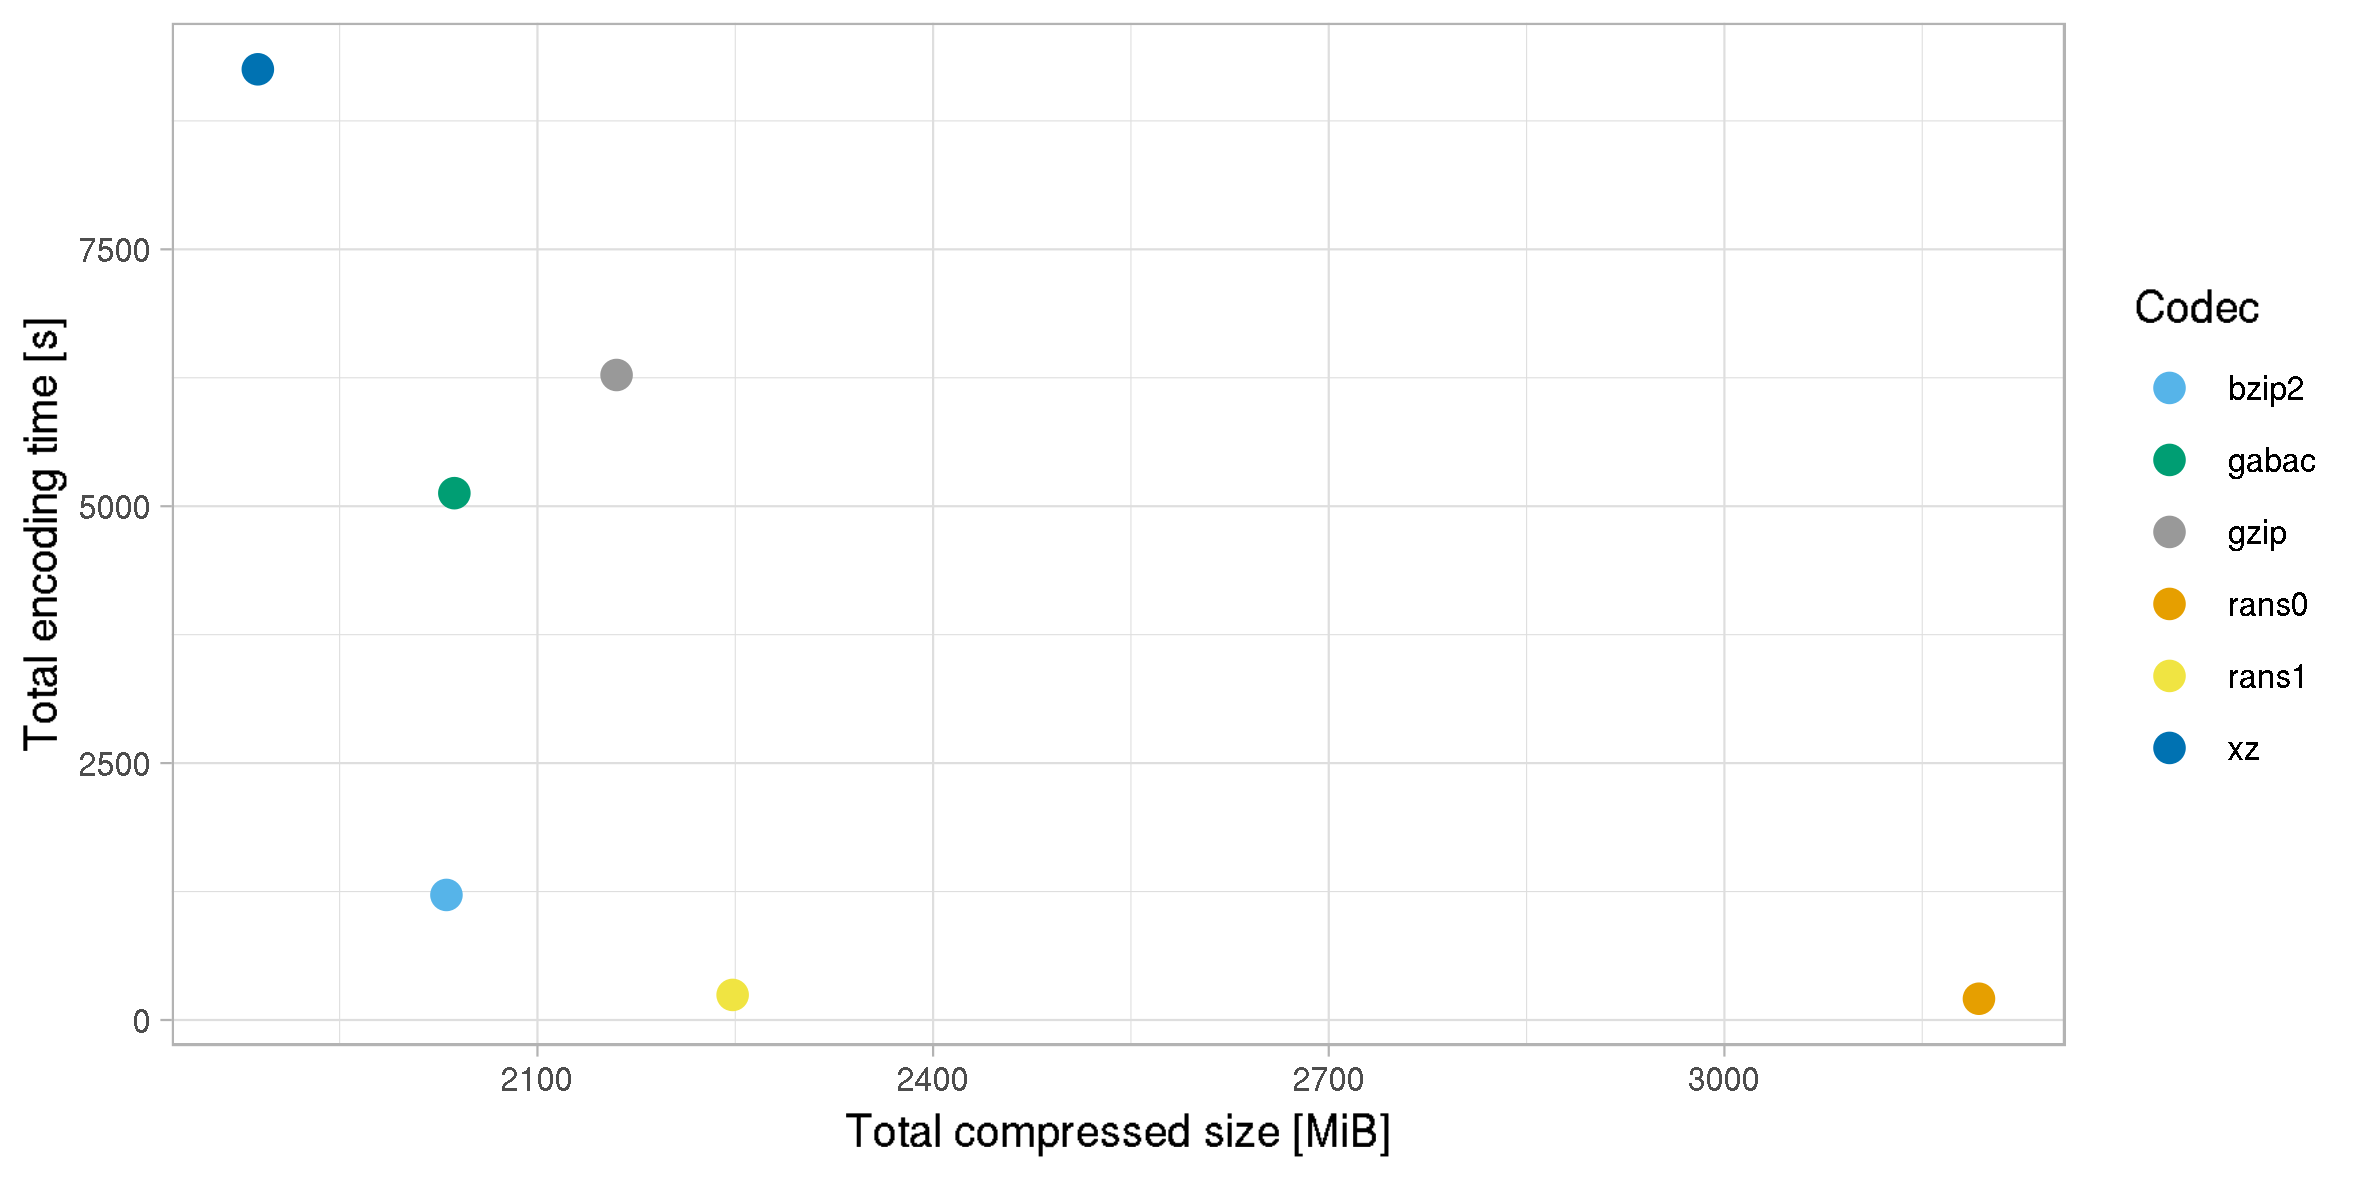

In [20]:
# Install libraries
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("IRdisplay")

# Load libraries
library("dplyr", warn.conflicts = FALSE)
library("ggplot2")
library("IRdisplay")

# Load the data
dataframe = read.csv("results/CRAM_and_DeeZ_total_metrics.csv")

# Log some data
#print(dataframe)

# Do not generate Rplots.pdf
pdf(NULL)

# Color blind-friendly palette
cbPalette <- c("#56B4E9", "#009E73", "#999999", "#E69F00", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# Total encoding time vs. total compressed size
print("Total encoding time vs. total compressed size")
ggplot2::ggplot(dataframe, aes(x = total_compressed_size_MiB, y = total_compression_time_s, color = codec)) +
  ggplot2::geom_point(size = 3) +
  ggplot2::guides(color = guide_legend(title = "Codec")) +
  ggplot2::theme_light() +
  ggplot2::scale_fill_manual(values = cbPalette) +
  ggplot2::scale_colour_manual(values = cbPalette) +
  ggplot2::labs(x = "Total compressed size [MiB]", y = "Total encoding time [s]") +
  ggplot2::ggsave(file = "Total_encoding_time_vs_total_compressed_size.png", width = 20, height = 10, units = "cm") +
  ggplot2::ggsave(file = "Total_encoding_time_vs_total_compressed_size.pdf", width = 20, height = 10, units = "cm")
display_png(file = "Total_encoding_time_vs_total_compressed_size.png")